In [2]:
#Lendo os dataframes
import pandas as pd
path = 'C:\\Users\\User\\Dropbox (CPI)\\EduardoMinsky\\Dados_Mineracao\\Dados Tabulares\\Dados_Relacionados\\'
#Pegando processos apenas do Pará
mun = pd.read_csv(path+'ProcessoMunicipio.csv')
substancia = pd.read_csv(path+'ProcessoSubstancia.csv')
eventos = pd.read_csv(path+'ProcessoEvento.csv')
processos = pd.read_csv(path+'Processo.csv')
pessoa = pd.read_csv(path+'ProcessoPessoa.csv')

In [3]:
#Criando analises para evento 333
#Pegando para ouro
ouro = substancia.query('Substancia.str.contains("OURO")',engine = 'python')
#Pegando eventos 333,1402,513
eventos333 = eventos.query('IDEvento == 333')
#Filtrando os processos ativos:
prceossos_ativos = processos.query('BTAtivo=="S"')
#Relacionando os processos ativos com o df 333
eventos333_ativos = eventos333[eventos333['DSProcesso'].isin(prceossos_ativos['DSProcesso'])]
#Relacionando Ouro com os processos de evento 333
eventos333_ativos_ouro = eventos333_ativos[eventos333_ativos['DSProcesso'].isin(ouro['DSProcesso'])]
#Transformando o campo de data do evento333 em datetime
eventos333_ativos_ouro['Data'] = pd.to_datetime(eventos333_ativos_ouro.DTEvento).dt.year
#Tirando registros duplicados
eventos333_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)


#Pegando os estados para esses processo ativos de ouro
mun_ouro_ativo_333 = mun[mun['DSProcesso'].isin(eventos333_ativos_ouro['DSProcesso'])]
#Agrupando os estados por Regiao (Norte, sul, Sudeste,CentroOeste, Nordeste)
sul =['RS','SC','PR']
sudeste = ['SP','MG','RJ','ES']
centrooeste =['MS','MT','GO','DF']
nordeste = ['BA','PI','MA','CE','RN','PB','PE','AL','SE']
norte = ['AC','RO','AM','RR','PA','TO','AP']
mun_ouro_ativo_333['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_333['UF']]
#Dando Join com o df eventos333_ativos_ouro para plotar o ano com regiao do brasil
join_333_regiao = eventos333_ativos_ouro.merge(mun_ouro_ativo_333,on='DSProcesso',how='inner')
join_333_regiao.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)

#Temos agora o dataframe eventos333_ativos_ouro que contem informaçoes para os processos de ouro, com evento 333
#E tambem temos esse mesmo dataframe mas separado por UF e regiões do BRasil
#join_333_regiao.query('Data >= 2000')

C:\Users\User\AppData\Local\Temp\ipykernel_8704\2868738035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eventos333_ativos_ouro['Data'] = pd.to_datetime(eventos333_ativos_ouro.DTEvento).dt.year
C:\Users\User\AppData\Local\Temp\ipykernel_8704\2868738035.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eventos333_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_8704\2868738035.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [6]:
#Criando analises para evento 513
#Pegando para ouro
ouro = substancia.query('Substancia.str.contains("OURO")',engine = 'python')
#Pegando eventos 513
eventos513 = eventos.query('IDEvento == 513')
#Filtrando os processos ativos:
prceossos_ativos = processos.query('BTAtivo=="S"')
#Relacionando os processos ativos com o df 513
eventos513_ativos = eventos513[eventos513['DSProcesso'].isin(prceossos_ativos['DSProcesso'])]
#Relacionando Ouro com os processos de evento 513
eventos513_ativos_ouro = eventos513_ativos[eventos513_ativos['DSProcesso'].isin(ouro['DSProcesso'])]
#Transformando o campo de data do evento513 em datetime
eventos513_ativos_ouro['Data'] = pd.to_datetime(eventos513_ativos_ouro.DTEvento).dt.year
#Tirando registros duplicados
eventos513_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)


#Pegando os estados para esses processo ativos de ouro
mun_ouro_ativo_513 = mun[mun['DSProcesso'].isin(eventos513_ativos_ouro['DSProcesso'])]
#Agrupando os estados por Regiao (Norte, sul, Sudeste,CentroOeste, Nordeste)
sul =['RS','SC','PR']
sudeste = ['SP','MG','RJ','ES']
centrooeste =['MS','MT','GO','DF']
nordeste = ['BA','PI','MA','CE','RN','PB','PE','AL','SE']
norte = ['AC','RO','AM','RR','PA','TO','AP']
mun_ouro_ativo_513['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_513['UF']]
#Dando Join com o df eventos333_ativos_ouro para plotar o ano com regiao do brasil
join_513_regiao = eventos513_ativos_ouro.merge(mun_ouro_ativo_513,on='DSProcesso',how='inner')
join_513_regiao.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)
full_join = join_513_regiao.merge(join_333_regiao,how='inner',on='DSProcesso')

#Temos agora o dataframe eventos513_ativos_ouro que contem informaçoes para os processos de ouro, com evento 513
#E tambem temos esse mesmo dataframe mas separado por UF e regiões do BRasil
full_join_2 = full_join.merge(processos[['QTAreaHA','DSProcesso']],on='DSProcesso',how='inner')

C:\Users\User\AppData\Local\Temp\ipykernel_8704\2070474371.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eventos513_ativos_ouro['Data'] = pd.to_datetime(eventos513_ativos_ouro.DTEvento).dt.year
C:\Users\User\AppData\Local\Temp\ipykernel_8704\2070474371.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eventos513_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_8704\2070474371.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [7]:
pd.set_option('display.max_columns', None)
#Calculando Q90 
para = full_join_2.query('Data_x >=2000').query('UF_x=="PA"')
mt = full_join_2.query('Data_x >=2000').query('UF_x=="MT"')
mt['QTAreaHA'] = mt['QTAreaHA'].str.replace(',', '.').astype(float)

para['QTAreaHA'] = para['QTAreaHA'].str.replace(',', '.').astype(float)

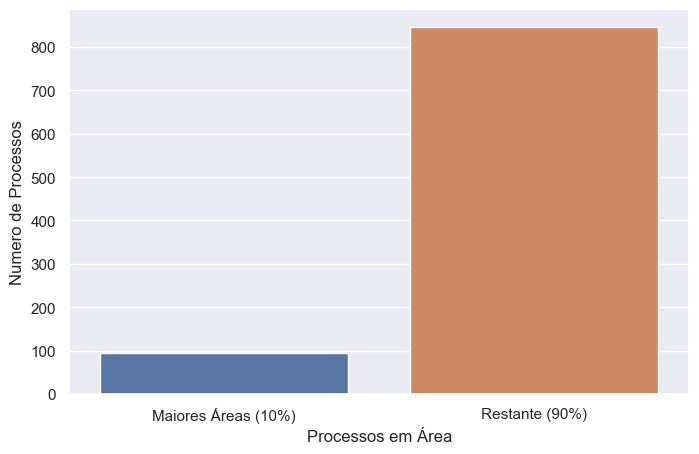

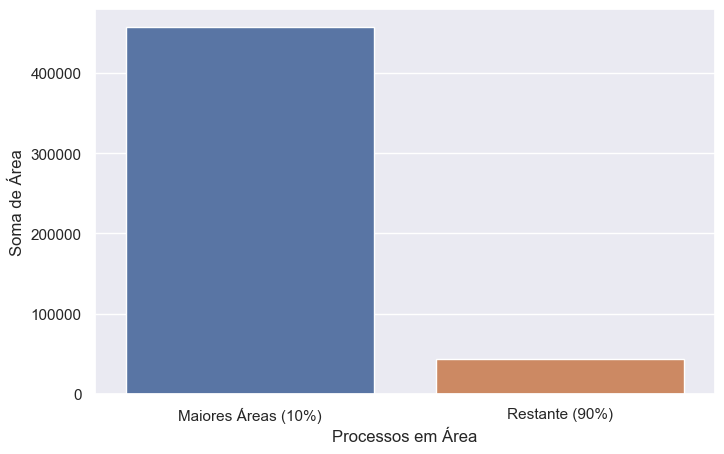

In [8]:
#Pegando os top 10%  e bottom 90% de area para processo do MT
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(8, 5)})
import numpy as np
np.quantile(mt['QTAreaHA'],0.90)#511.6260000000003
top10_mt = mt[mt['QTAreaHA'] > 511.6260000000003]
bottom_90mt = mt[mt['QTAreaHA'] < 511.6260000000003]
top10_mt.shape[0]
bottom_90mt.shape[0]

#Criando Dataframe para Quantidade de Processos para MT
d = {'Numero de Processos': [top10_mt.shape[0],bottom_90mt.shape[0]], 'Processos em Área': ['Maiores Áreas (10%)', 'Restante (90%)']}
df_pedido = pd.DataFrame(data=d)


sns.barplot(data=df_pedido, x="Processos em Área", y="Numero de Processos")
plt.show()

w = {'Soma de Área': [top10_mt.QTAreaHA.sum(),bottom_90mt.QTAreaHA.sum()], 'Processos em Área': ['Maiores Áreas (10%)', 'Restante (90%)']}
df_area = pd.DataFrame(data=w)
sns.barplot(data=df_area, x="Processos em Área", y="Soma de Área")
plt.show()

In [57]:
df_area

,Soma de Área,Processos em Área
0,456483.23,Maiores Áreas (10%)
1,43449.97,Restante (90%)


In [9]:
pessoa_fisica = pessoa.query('Pessoa=="F"')
pessoa_juridica = pessoa.query('Pessoa=="J"')
p_fisica_only = pessoa_fisica[~pessoa_fisica['DSProcesso'].isin(pessoa_juridica['DSProcesso'])]
juridico_certo = pessoa[ ~ pessoa['DSProcesso'].isin(p_fisica_only['DSProcesso'])]
#Criando dummys
p_fisica_only['Pessoas'] = 'Pessoa Fisica'
juridico_certo['Pessoas'] = 'Pessoa Juridica'
p_fisica_only.drop_duplicates('DSProcesso',keep = 'first',inplace=True)
juridico_certo.drop_duplicates('DSProcesso',keep = 'first',inplace=True)
pessoas_certo = pd.concat([p_fisica_only,juridico_certo])

C:\Users\User\AppData\Local\Temp\ipykernel_8704\1031967110.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_fisica_only['Pessoas'] = 'Pessoa Fisica'
C:\Users\User\AppData\Local\Temp\ipykernel_8704\1031967110.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juridico_certo['Pessoas'] = 'Pessoa Juridica'
C:\Users\User\AppData\Local\Temp\ipykernel_8704\1031967110.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

In [17]:
#MT
511.6260000000003
a = pessoas_certo[['DSProcesso','Pessoas','Pessoa_NOME']]
bottom_90mt
top10_mt
top10x_mt= bottom_90mt.merge(a,how='inner',on='DSProcesso')
top10x_mt.drop_duplicates('DSProcesso').groupby('Pessoas').Pessoas.value_counts()


Pessoas          Pessoas        
Pessoa Fisica    Pessoa Fisica      495
Pessoa Juridica  Pessoa Juridica    350
Name: Pessoas, dtype: int64

In [15]:
g = top10x_mt.groupby('Pessoas',as_index=False).Pessoas.value_counts()
g

,Pessoas,count
0,Pessoa Fisica,495
1,Pessoa Juridica,350


In [8]:
#Pegando os top 10%  e bottom 90% de area para processo do PA
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(8, 5)})
import numpy as np
np.quantile(para['QTAreaHA'],0.90)#100.15900000000002

top10_pa = para[para['QTAreaHA'] > 100.15900000000002]
bottom_90pa = para[para['QTAreaHA'] < 100.15900000000002]
top10_pa.shape[0]
bottom_90pa.shape[0]

#Criando Dataframe para Quantidade de Processos para MT
d = {'Numero de Processos': [top10_pa.shape[0],bottom_90pa.shape[0]], 'Processos em Área': ['Maiores Áreas (10%)', 'Restante (90%)']}
df_pedido = pd.DataFrame(data=d)


sns.barplot(data=df_pedido, x="Processos em Área", y="Numero de Processos")
plt.show()

w = {'Soma de Área': [top10_pa.QTAreaHA.sum(),bottom_90pa.QTAreaHA.sum()], 'Processos em Área': ['Maiores Áreas (10%)', 'Restante (90%)']}
df_area = pd.DataFrame(data=w)
sns.barplot(data=df_area, x="Processos em Área", y="Soma de Área")
plt.show()


100.15900000000002

In [76]:
df_pedido

,Numero de Processos,Processos em Área
0,104,Maiores Áreas (10%)
1,934,Restante (90%)


In [77]:
pessoa_fisica = pessoa.query('Pessoa=="F"')
pessoa_juridica = pessoa.query('Pessoa=="J"')
p_fisica_only = pessoa_fisica[~pessoa_fisica['DSProcesso'].isin(pessoa_juridica['DSProcesso'])]
juridico_certo = pessoa[ ~ pessoa['DSProcesso'].isin(p_fisica_only['DSProcesso'])]
#Criando dummys
p_fisica_only['Pessoas'] = 'Pessoa Fisica'
juridico_certo['Pessoas'] = 'Pessoa Juridica'
p_fisica_only.drop_duplicates('DSProcesso',keep = 'first',inplace=True)
juridico_certo.drop_duplicates('DSProcesso',keep = 'first',inplace=True)
pessoas_certo = pd.concat([p_fisica_only,juridico_certo])

C:\Users\User\AppData\Local\Temp\ipykernel_10668\1031967110.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_fisica_only['Pessoas'] = 'Pessoa Fisica'
C:\Users\User\AppData\Local\Temp\ipykernel_10668\1031967110.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juridico_certo['Pessoas'] = 'Pessoa Juridica'
C:\Users\User\AppData\Local\Temp\ipykernel_10668\1031967110.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

In [9]:
#PA
100.15900000000002
a = pessoas_certo[['DSProcesso','Pessoas','Pessoa_NOME']]
bottom_90pa
top10_pa
top10x_pa= bottom_90pa.merge(a,how='inner',on='DSProcesso')
top10x_pa.drop_duplicates('DSProcesso').query('QTAreaHA < 100.15900000000002').groupby('Pessoas').QTAreaHA.sum()


Pessoas
Pessoa Fisica      35353.14
Pessoa Juridica     7947.50
Name: QTAreaHA, dtype: float64

In [82]:
h = top10_pa.groupby('Municipios_x',as_index=False).QTAreaHA.sum().sort_values(by='QTAreaHA',ascending=False)
h[h['QTAreaHA']>h['QTAreaHA'].median()]

,Municipios_x,QTAreaHA
3,ITAITUBA,83771.42
0,ALTAMIRA,45215.90
4,JACAREACANGA,28921.94
10,SÃO FÉLIX DO XINGU,10097.93
6,RURÓPOLIS,9917.91
13,ÁGUA AZUL DO NORTE,9905.43
5,NOVO PROGRESSO,8848.32


## Analise Específica para o Para
- desde 19 de fevereiro de 2021; e

- com área menor ou igual a 500 hectares; e

In [10]:
#Loading packages
import pandas as pd

para = mun.query('UF=="PA"')

ouro = substancia.query('Substancia.str.contains("OURO")',engine='python')
#Filtrando no df do Para, quais são para substância ouro, baseado no DF de Ouro
para_ouro = para[para['DSProcesso'].isin(ouro['DSProcesso'])]
#Lendo a planilha de eventos e filtrando para os eventos 333 ou 513:

eventos_333 = eventos.query('IDEvento==333')
eventos_513 = eventos.query("IDEvento==513")

#Lendo a planilha principal de Processos e dando inner join com a planilha de eventos

processos_eventos_333 = processos.merge(eventos_333,how='inner',on='DSProcesso')
processos_eventos_333_513 = processos_eventos_333.merge(eventos_513,how='inner',on='DSProcesso')

#Filtrando os processo em processos_eventos_333_513 que são para o Para e para ouro
processos_eventos_333_513_para_ouro = processos_eventos_333_513[processos_eventos_333_513['DSProcesso'].isin(para_ouro['DSProcesso'])]
processos_eventos_333_513_para_ouro.drop_duplicates('DSProcesso',inplace=True)
#Lendo a planilha de Processos Pessoa e unindo ela ao nosso DF principal

processos_eventos_333_513_para_ouro_pessoa = processos_eventos_333_513_para_ouro.merge(pessoas_certo,how='inner',on='DSProcesso')
processos_eventos_333_513_para_ouro_pessoa.drop_duplicates('DSProcesso',keep = 'last',inplace=True)
#Passando a coluna de Área para numérico:
processos_eventos_333_513_para_ouro_pessoa['QTAreaHA'] = processos_eventos_333_513_para_ouro_pessoa['QTAreaHA'].str.replace(',', '.').astype(float)
#Criando coluna de Data para o evento 513 e 333
processos_eventos_333_513_para_ouro_pessoa['Evento_513_Date'] = pd.to_datetime(processos_eventos_333_513_para_ouro_pessoa.DTEvento_y)
processos_eventos_333_513_para_ouro_pessoa['Evento_333_Date'] = pd.to_datetime(processos_eventos_333_513_para_ouro_pessoa.DTEvento_x)
#Selecionando as colunas que queremos:
processos_eventos_333_513_para_ouro_pessoa = processos_eventos_333_513_para_ouro_pessoa.loc[:,~processos_eventos_333_513_para_ouro_pessoa.columns.duplicated()].copy()
columns_keep = ['DSProcesso','BTAtivo','QTAreaHA','Tipo_Requerimento','IDEvento_x','Evento__x',
                'Evento_333_Date','IDEvento_y','Evento__y','Evento_513_Date','Pessoa','Pessoas','Pessoa_NOME','TipoRelacao']
processos_eventos_333_513_para_ouro_pessoa_2 = processos_eventos_333_513_para_ouro_pessoa.filter(items = columns_keep).copy()
#Filtrando para os processos que o evento 513 ocorreu no dia 19 de fevereiro de 2021 ou depois
processos_data_apos = processos_eventos_333_513_para_ouro_pessoa_2[processos_eventos_333_513_para_ouro_pessoa_2['Evento_333_Date']>= '2021-02-19']


#Filtrando para os processos que o evento 513 ocorreu antes do dia 19 de fevereiro de 2021 ou depois
processos_data_antes = processos_eventos_333_513_para_ouro_pessoa_2[processos_eventos_333_513_para_ouro_pessoa_2['Evento_333_Date']< '2021-02-19']


C:\Users\User\AppData\Local\Temp\ipykernel_10600\433832621.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processos_eventos_333_513_para_ouro.drop_duplicates('DSProcesso',inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_10600\433832621.py:24: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  processos_eventos_333_513_para_ouro_pessoa = processos_eventos_333_513_para_ouro.merge(pessoas_certo,how='inner',on='DSProcesso')


In [17]:
processos_data_apos_500ha = processos_data_apos[processos_data_apos['QTAreaHA']<= 500]
processos_data_apos_500ha.drop_duplicates("DSProcesso",keep = 'first',inplace=True)
a = processos_data_apos_500ha.groupby(['Pessoa_NOME'],as_index=False).Pessoas.value_counts().sort_values(by='count',ascending=False)
b = processos_data_apos_500ha.groupby(['Pessoa_NOME'],as_index=False).QTAreaHA.sum().sort_values(by='QTAreaHA',ascending=False)
processos_data_apos_500ha.shape

C:\Users\User\AppData\Local\Temp\ipykernel_10600\776505192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processos_data_apos_500ha.drop_duplicates("DSProcesso",keep = 'first',inplace=True)


(27, 14)

In [12]:
processos_data_apos[processos_data_apos['QTAreaHA']< 500]

,DSProcesso,BTAtivo,QTAreaHA,Tipo_Requerimento,IDEvento_x,Evento__x,Evento_333_Date,IDEvento_y,Evento__y,Evento_513_Date,Pessoa,Pessoas,Pessoa_NOME,TipoRelacao
47,850.041/2022,S,499.99,Requerimento de Lavra Garimpeira,333,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022-01-14,513,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2023-02-13,F,Pessoa Juridica,WAGNER LOPES GHELER,Responsável Técnico
139,850.178/2022,S,50.00,Requerimento de Lavra Garimpeira,333,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022-03-09,513,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2022-08-23,F,Pessoa Fisica,Adriano da Costa Paiva,Representante Legal
154,850.216/2022,S,18.56,Requerimento de Mudança de Regime para PLG,333,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022-03-25,513,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2022-06-07,J,Pessoa Juridica,COOMARU COOPERATIVA DE PRODUTORES DE OURO DO CUMA,Titular\Requerente
155,850.223/2022,S,49.93,Requerimento de Lavra Garimpeira,333,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022-03-30,513,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2022-12-02,F,Pessoa Fisica,Leonardo Bruno Marreira de Aquino,Responsável Técnico
209,850.291/2022,S,28.68,Requerimento de Lavra Garimpeira,333,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022-04-14,513,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2022-11-10,F,Pessoa Fisica,Leonardo Bruno Marreira de Aquino,Responsável Técnico
213,850.292/2022,S,50.00,Requerimento de Lavra Garimpeira,333,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022-04-14,513,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2022-12-28,F,Pessoa Fisica,Leonardo Bruno Marreira de Aquino,Responsável Técnico
230,850.312/2022,S,49.13,Requerimento de Mudança de Regime para PLG,333,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022-04-27,513,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2022-08-23,F,Pessoa Fisica,Caubi André Caldeira Fernandes,Responsável Técnico
232,850.316/2022,S,50.35,Requerimento de Lavra Garimpeira,333,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022-04-29,513,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2022-08-24,F,Pessoa Juridica,PAULO SERGIO DE AMORIM PARANHOS,Responsável Técnico
233,850.318/2022,S,20.39,Requerimento de Lavra Garimpeira,333,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022-04-29,513,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2022-08-24,F,Pessoa Juridica,PAULO SERGIO DE AMORIM PARANHOS,Responsável Técnico
287,850.374/2021,S,49.91,Requerimento de Lavra Garimpeira,333,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2021-03-11,513,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2022-01-25,F,Pessoa Juridica,WAGNER LOPES GHELER,Responsável Técnico


In [23]:



a = a.sort_values('count',ascending=False)
a.groupby(['Pessoa'])['count'].sum()
processos_data_apos_500ha.query("Pessoa_NOME=='COOPERATIVA DE GARIMPEIROS E MINERADORES SUSTENTA'")

C:\Users\User\AppData\Local\Temp\ipykernel_13896\3223802450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processos_data_apos_500ha.drop_duplicates("DSProcesso",keep = 'first',inplace=True)


,DSProcesso,BTAtivo,QTAreaHA,Tipo_Requerimento,IDEvento_x,Evento__x,Evento_333_Date,IDEvento_y,Evento__y,Evento_513_Date,Pessoa,Pessoa_NOME,TipoRelacao
1055,850.513/2021,S,171.11,Requerimento de Lavra Garimpeira,333,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOLIZADO,2021-04-07,513,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2022-10-25,J,COOPERATIVA DE GARIMPEIROS E MINERADORES SUSTENTA,Titular\Requerente
3467,851.392/2021,S,145.47,Requerimento de Lavra Garimpeira,333,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOLIZADO,2021-08-24,513,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2022-03-11,J,COOPERATIVA DE GARIMPEIROS E MINERADORES SUSTENTA,Titular\Requerente
3473,851.393/2021,S,17.02,Requerimento de Lavra Garimpeira,333,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOLIZADO,2021-08-24,513,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2022-05-11,J,COOPERATIVA DE GARIMPEIROS E MINERADORES SUSTENTA,Titular\Requerente


In [30]:
processos_data_apos_500ha = processos_data_apos[processos_data_apos['QTAreaHA']<= 500]
processos_data_apos_500ha.drop_duplicates("DSProcesso",keep = 'first',inplace=True)
b = processos_data_apos_500ha.groupby(['Pessoa_NOME','Pessoa'],as_index=False).QTAreaHA.sum()
b = b.sort_values('QTAreaHA',ascending=False)
b

C:\Users\User\AppData\Local\Temp\ipykernel_13896\2856905294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processos_data_apos_500ha.drop_duplicates("DSProcesso",keep = 'first',inplace=True)


,Pessoa_NOME,Pessoa,QTAreaHA
17,OURO NORTE COOPERATIVA DO GARIMPEIRO LEGAL - CGL,J,499.99
3,COOPERATIVA DE GARIMPEIROS E MINERADORES SUSTENTA,J,333.60
8,Coogamibra Cooperativa dos Garimpeiros e Mineradores do Brasil,J,153.12
20,Rodrigo Rodrigues de mello,F,92.70
23,diogenes alves do nascimento netto,F,50.35
15,Lucas de Barros campelo,F,50.00
1,CASSYO FERREIRA DA SILVA,F,50.00
12,JESULINO RODRIGUES DA ROCHA,F,50.00
19,ROSA MARIA CAMPOS FERREIRA,F,49.93
5,COOPERTRANS COOPERATIVA DOS GARIMPEIROS DE MORAES ALMEIDA E TRANSGARIMPEIRA,J,49.91


In [35]:
pd.set_option('display.max_colwidth', None)
processos_data_apos_500ha.drop_duplicates("DSProcesso",keep = 'first',inplace=True)
c = processos_data_apos_500ha.groupby(['Pessoa_NOME','Pessoa','QTAreaHA'],as_index=False).QTAreaHA.sum().sort_values('QTAreaHA',ascending=False).reset_index()
p = processos_data_apos_500ha.groupby(['Pessoa_NOME','Pessoa'],as_index=False).Pessoa_NOME.value_counts().sort_values('count',ascending=False).reset_index()
f = c.merge(p,how='inner',on='Pessoa_NOME')

d = f[['Pessoa_NOME','Pessoa_x','QTAreaHA','count']]
d.sort_values('QTAreaHA',ascending=False)
d.groupby(['Pessoa_NOME','Pessoa_x'],as_index=False).QTAreaHA.sum().sort_values('QTAreaHA',ascending=False).QTAreaHA.sum()

C:\Users\User\AppData\Local\Temp\ipykernel_13896\1104467606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processos_data_apos_500ha.drop_duplicates("DSProcesso",keep = 'first',inplace=True)


1860.85

In [16]:
d.query('Pessoa_NOME=="COOPERATIVA DE GARIMPEIROS E MINERADORES SUSTENTA"')

,Pessoa_NOME,Pessoa_x,QTAreaHA,count
1,COOPERATIVA DE GARIMPEIROS E MINERADORES SUSTENTA,J,171.11,3
2,COOPERATIVA DE GARIMPEIROS E MINERADORES SUSTENTA,J,145.47,3
3,COOPERATIVA DE GARIMPEIROS E MINERADORES SUSTENTA,J,17.02,3


In [13]:
processos_data_apos_500ha = processos_data_apos[processos_data_apos['QTAreaHA']<= 500]
a = processos_data_apos_500ha.merge(mun,how='inner',on='DSProcesso')
a.drop_duplicates('DSProcesso',keep='first',inplace=True)
a.groupby(['Municipios'],as_index=False).QTAreaHA.sum().sort_values('QTAreaHA',ascending=False).reset_index()

,index,Municipios,QTAreaHA
0,3,ITAITUBA,1394.61
1,5,RIO MARIA,196.86
2,4,NOVO PROGRESSO,153.12
3,0,ALTAMIRA,50.00
4,7,ÁGUA AZUL DO NORTE,33.43
5,1,CUMARU DO NORTE,18.56
6,6,TUCUMÃ,8.23
7,2,ELDORADO DO CARAJÁS,6.04
